# DCP & Autograd 
# или 
# как правильно ставить задачи и автоматически вычислять градиенты

## Задача оптимизации

\begin{align*}
& \min_{x \in \mathbb{R}^n} \; f_0(x)\\
\text{s.t. } & f_i(x) \leq 0, \; i = 1,\ldots, m \\
& h_j(x) = 0, \; j = 1,\ldots,p 
\end{align*}

- Возможность эффективного решения сильно зависит от свойств $f_0, f_i, h_j$
- Если $f_0, f_i, h_j$ аффинны, то это задача линейного программирования (LP), которая может быть решена крайне быстро
- Простые задачи с нелинейными $f_i, h_j$ могут быть очень сложными для решения

## Задача выпуклой оптимизации

\begin{align*}
& \min_{x \in \mathbb{R}^n} f_0(x)\\
\text{s.t. } & f_i(x) \leq 0, \; i = 1,\ldots,m \\
& Ax = b \\
\end{align*}

- $f_0, f_i$ выпуклые функции: для всех $x, y$ и $\alpha \in [0, 1]$

$$
f(\alpha x + (1 - \alpha)y) \leq \alpha f(x) + (1 - \alpha)f(y)
$$

- Ограничения типа равенств аффинны

### Свойства задач выпуклой оптимизации

- Подмножество задач оптимизации: LP - частный случай
- Могут выглядеть очень сложно, однако решаются также эффективно как и задача LP
- Встречаются гораздо чаще, чем можно было бы подумать
- Очень много приложений, часть обсудили на прошлом семинаре

### Общие подходы к использованию выпуклости

- Надеяться/предполагать/делать вид, что $f_i$ выпуклы
    - Просто для пользователя
    - Теряется часть преимуществ выпуклых задач
- Проверка выпуклости задачи перед решением
    - в общем случае может быть затруднительна  
- Построение выпуклой задачи из элементарных блоков
    - пользователь следует фиксированному набору правил при определении $f_i$
    - выпуклость проверяется автоматически

### Как проверить выпуклость?

- Определение, критерии первого или второго порядка, например $\nabla^2 f(x) \succeq 0$
- Исчисление выпуклых функций: построение $f$ специальным образом
    - Дан набор простых функций, выпуклость которых известна
    - Даны сочетания и преобразования, не меняющие выпуклость

### Примеры простых выпуклых функций

- При $x > 0$: $x^p$ для $p < 0, \; p \geq 1$ и $x ^{-p}$ для $p \in [0, 1]$
- $e^x, \; -\log x, \; x\log x$
- $\langle a, x \rangle + b$
- $\|x\|$ - любая норма
- $\max \{x_1, \ldots, x_n \}$ и $\log(e^{x_1} + \ldots + e^{x_n})$
- $\log\det X^{-1}$ для $X \in \mathbb{S}^n_{+}$

### Правила исчисления выпуклых функций

- Умножение на неотрицательную константу: $f$ выпукла и $\alpha > 0$, тогда $\alpha f$ выпукла
- Сложение: $f, g$ выпуклы, тогда $f + g$ выпукла
- Композиция с аффинной функцией: $f$ выпукла, тогда $f(Ax + b)$ также выпукла
- Взятие максимума: $f_1,\ldots, f_m$ выпуклы, тогда $\max\limits_{i=1,\ldots,m} \{f_i(x)\}$ выпукла
- Композиция: если $h$ выпукла и возрастает, $f$ выпукла, тогда $g(x) = h(f(x))$ выпукла
- И многие другие...

#### Примеры

- $f(x) = \max\limits_{i=1,\ldots,m} (\langle a_i, x \rangle + b_i)$
- $\ell_1$ регуляризация задачи наименьших квадратов

$$
f(x) = \frac{1}{2} \|Ax - b\|_2^2 + \lambda \|x\|_1, \quad \lambda > 0
$$

- Максимальное собственное значение $A \in \mathbb{S}^n$: 

$$
\lambda_{\max}(A) = \sup\limits_{\|x\|_2 = 1} (x^{\top}Ax )
$$


### Как решать задачу выпуклой оптимизации?

- Использовать "стандартный" солвер (для LP, QP, SDP...), примеры таких солверов были на прошлом семинаре (например [sdpt](https://github.com/SQLP/SDPT3) или [MOSEK](https://www.mosek.com/))
    - лёгкий путь
    - задача **должна быть** в стандартной форме для выбранного солвера
    - сложность разработки компенсируется количеством пользователей
- Придумать и/или реализовать метод самостоятельно
    - Трудоёмко
    - Может быть эффективнее для конкретной задаче
- Преобразовать задачу к стандартному виду и использовать стандартный солвер
    - Расширяет множество задач, подходящих для решения
    - Преобразование может быть громоздким

#### Методы внутренней точки (IPM) для выпуклых задач
- [Interior-Point Polynomial Algorithms in Convex Programming, Y. Nesterov, A. Nemirovskii, 1994](https://epubs.siam.org/doi/abs/10.1137/1.9781611970791)
- Обзор про IPM см. [тут](https://people.kth.se/~andersf/doc/sirev41494.pdf)
- Применим для **гладких** $f_i$ и задач в конической форме (SOCP, SDP)

\begin{align*}
& \min f_0(x)\\
\text{s.t. } & Ax = b\\
& x \in \mathcal{K},
\end{align*}

где $\mathcal{K}$ - некоторый конус (обычно $\mathbb{R}^n_{+}$, $\mathbb{S}^n_{+}$ или конус второго порядка) или декартово произведение конусов

#### А если IPM нельзя применить к задаче?


- Пример: $\ell_1$ регуляризация задачи наименьших квадратов

$$
f(x) = \frac{1}{2} \|Ax - b\|_2^2 + \lambda \|x\|_1, \quad \lambda > 0
$$

- Задача выпукла, но $f$ негладкая!
- **Основная идея**: изменить задачу так, чтобы IPM можно было применять
- Даже если в новой задаче будет больше переменных и ограничений, она может быть эффективна решена с помощью IPM

#### Пример

- Исходная задача: $n$ переменных, нет ограничений 

$$
\min_x \frac{1}{2} \|Ax - b\|_2^2 + \lambda \|x\|_1, \quad \lambda > 0
$$

- Введём новую переменную $t \in \mathbb{R}^n$ и новые ограничения $|x_i| \leq t_i$:

\begin{align*}
& \min_{(x, t)} \frac{1}{2} \|Ax - b\|_2^2 + \lambda \mathbf{1}^{\top}t\\
\text{s.t. } & -t \leq x \leq t
\end{align*}

- В новой задаче $2n$ переменных и $2n$ ограничений, но она **гладкая**! 
- **Важно**: задачи эквивалентны! Решив одну, получим решение другой и наоборот

## Преобразование задачи и эффективность решения

- Дана выпуклая задача $P_0$
- Выполняются последовательные эквивалентные преобразования

$$ 
P_0 \to P_1 \to \ldots \to P_K,
$$

где $P_K$ - задача, которую можно решать IPM
- Эффективное решение $P_K$
- Обратное преобразование решения $P_K$ в решение $P_0$
- $P_K$ может иметь больше ограничений и/или переменных, но наличие определённой структуры и высокая эффективность IPM компенсируют это

### Примеры преобразований задач

- Правила преобразования выпуклых функций порождают преобразования задач
- $\max \{ f_1(x), f_2(x) \}$   
    - Вводим новую переменную $t = \max \{ f_1(x), f_2(x) \}$
    - Добавляем ограничения $f_1(x) \leq t, \; f_2(x) \leq t$
- $h(f(x))$    
    - Вводим новую переменную $t = f(x)$
    - Добавляем ограничение $f(x) \leq t$

### От доказательства выпуклости к применимости IPM
\begin{align*}
& \min_{x \in \mathbb{R}^n} f_0(x)\\
\text{s.t. } & f_i(x) \leq 0, \; i = 1,\ldots,m \\
& Ax = b \\
\end{align*}


- Построение $f_i$ из элементарных функций и правил преобразований даёт доказательство выпуклости
- Аналогичный разбор даёт преобразование задачи к форме, состоящей из элементарных функций и аффинных равенств 
- Если элементарные функции подходят для IPM, преобразование автоматически даёт форму задачи, которая может быть решена IPM

## Disciplined convex programming (DCP)

- Задаются искомые переменные и фиксированные параметры
- Целевая функция и ограничения строятся из элементарных функций с помощью правил композиций и сочетаний
- Задача выпукла по построению
- Автоматически разбирается на элементы
- Приводится к форме для запуска IPM
- Решается некоторым стандартным пакетом для IPM
- Восстанавливается решение исходной задачи


Визуализацию и результат разбора можно посмотреть на [сайте](http://dcp.stanford.edu/)

<img src="./dcp_parse.png" width=800>

### История

- Системы [AMPL](https://ampl.com/), [GAMS](https://en.wikipedia.org/wiki/General_Algebraic_Modeling_System) - 1970-ые
- Пакеты для задач SDP/LMI: <tt>sdpsol</tt> (Wu, Boyd),
<tt>lmilab</tt> (Gahinet, Nemirovsky), <tt>lmitool</tt> (El Ghaoui) - 1990-ые 
- <tt>yalmip </tt> (L&ouml;fberg 2000–)
- automated convexity checking (Crusius PhD thesis 2002)
- disciplined convex programming (DCP) (Grant, Boyd, Ye 2004)
- <tt>cvx</tt> (Grant, Boyd, Ye 2005) для MATLAB
- <tt>cvxopt</tt> (Dahl, Vandenberghe 2005)
- <tt>cvxpy</tt> (Diamond, Boyd 2016) для Python
- disciplined geometric programming (DGP) (Agarwal et al 2018) - [paper](https://web.stanford.edu/~boyd/papers/pdf/dgp.pdf)


## Главное по DCP
Pro:

- Проверка выпуклости и генерация преобразования задачи для IPM
- Построение задачи: элементарные выпуклые функции + правила композиций и преобразований 
- Очень похоже на математическую нотацию

Contra:

- Не про "plug & play" или "try my code"

<img src=dcp_mem.jpg >

- Нельзя записать произвольную задачу и надеяться, что она будет выпукла

## Солверы для решения задач оптимизации oбщего вида

- [ipopt](https://projects.coin-or.org/Ipopt)
- [Pyomo](http://www.pyomo.org/)
- [Gurobi](http://www.gurobi.com/)

In [3]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
%matplotlib inline
print(cvx.installed_solvers())

['ECOS', 'ECOS_BB', 'CVXOPT', 'GLPK', 'GLPK_MI', 'SCS', 'MOSEK', 'OSQP']


## DCP with CVXPy

Model problem is [compressed sensing](https://www.raeng.org.uk/publications/other/candes-presentation-frontiers-of-engineering)

\begin{align*}
& \min_x \|x\|_1\\
\text{s.t. } & Ax = b,
\end{align*}

где $A \in \mathbb{R}^{m \times n}$ и $n \gg m$

### Data generation

In [4]:
n = 1000
m = 10
x_true = np.random.randn(n)
x_true[np.abs(x_true) > 0.05] = 0
print("Num of nnz in x = {}".format(np.sum(x_true != 0)))
A = np.random.randn(m, n)
b = A.dot(x_true)

Num of nnz in x = 42


### CVXPy

In [5]:
x = cvx.Variable(n)
objective = cvx.norm1(x)
constr = [A*x == b]
problem = cvx.Problem(cvx.Minimize(objective), constr) 
problem.solve(verbose=True, max_iter=3000)

-----------------------------------------------------------------
           OSQP v0.5.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 2000, constraints m = 2010
          nnz(P) + nnz(A) = 14000
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 3000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on

iter   objective    pri res    dua res    rho        time
   1  -8.0000e+03   8.00e+00   6.68e+01   1.00e-01   4.68e-03s
 200   2.9266e-01   2.64e-03   2.38e-02   3.27e+00   7.63e-03s
 400   2.6957e-01   3.28e-04   1.08e-02   3.27e+00   2.68e-

0.2706647563479417

### Check solution

In [6]:
tol= 1e-4
print(np.linalg.norm(A.dot(x.value) - b))
print(np.linalg.norm(A[:, np.abs(x.value) > tol].dot(x.value[np.abs(x.value) > tol]) - b))
print(np.linalg.norm(x_true - x.value))
print("Num nnz = {}".format(np.sum(np.abs(x.value) > tol)))

5.366577785575698e-07
0.02806119193399998
0.2170992263162404
Num nnz = 200


(array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 9 Text yticklabel objects>)

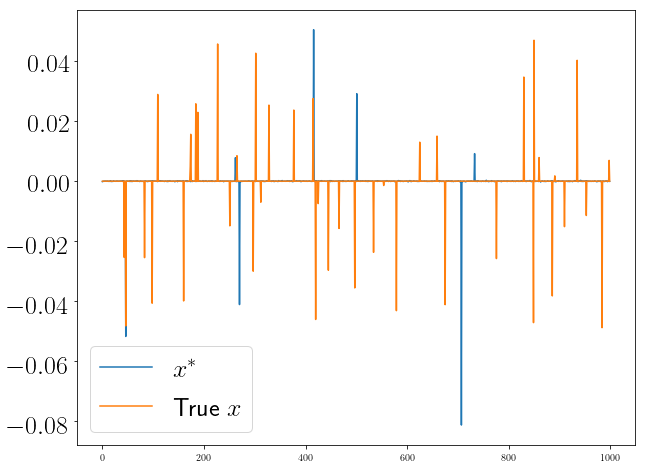

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(x.value, label=r"$x^*$")
plt.plot(x_true, label=r"True $x$")
plt.legend(fontsize=26)
plt.yticks(fontsize=26)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

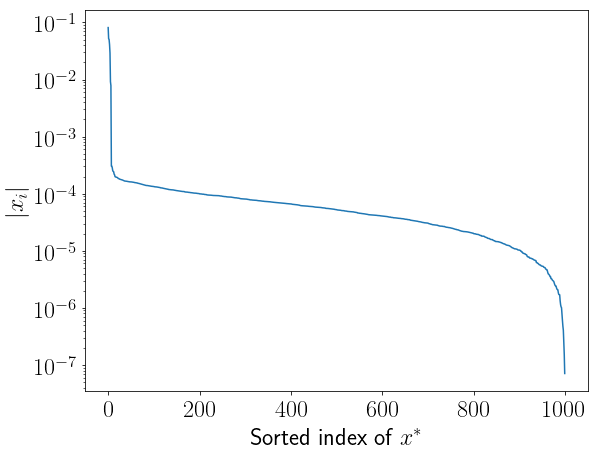

In [8]:
plt.figure(figsize=(9, 7))
plt.semilogy(np.sort(np.abs(x.value))[::-1])
plt.ylabel("$|x_i|$", fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel(r"Sorted index of $x^*$", fontsize=24)
plt.xticks(fontsize=24)

### Check DCP

In [9]:
# Non-affine equality constraint
y = cvx.Variable(1)
obj = cvx.Minimize(cvx.power(y, 3))
problem = cvx.Problem(obj, [cvx.power(y - 3, 2) == 0])
problem.solve(verbose=True)

DCPError: Problem does not follow DCP rules.

In [10]:
# Non-convex objective function 
y = cvx.Variable(2)
obj = cvx.Minimize(y[0]**2 - y[1]**2)
problem = cvx.Problem(obj)
problem.solve(verbose=True)

DCPError: Problem does not follow DCP rules.

# Autodiff на примере PyTorch'a

## Вычисление производных (градиентов)

- [Теорема Бауэра-Штрассена](https://core.ac.uk/download/pdf/82480031.pdf)
- [Лекция с пояснениями](https://courses.cs.washington.edu/courses/cse446/18wi/slides/auto-diff.pdf)
- Граф вычислений
    - Статический
    - Динамический

### Существующие реализации

- Статическая (Tensorflow, Theano): сначала строится граф вычислений, после чего выполняется вычисление 
    - Pros: 
        - Процесс вычислений в статическом графе можно оптимизировать
        - Возможна улучшенная поддержка на уровне железа
    - Cons:
        - Сложно отлаживать и модифицировать функцию
        - Изучение языка построения графа
- Динамический (PyTorch, Autograd): граф строится непосредственно в процессе вычислений
    - Плюсы:
        - Можно писать на Вашем любимом языке, без дополнительных усилий
        - Проще отлаживать, поскольку есть доступ к промежуточным вычислениям
    - Минусы:
        - сложнее оптимизировать процедуру вычисления, чем в статическом графе

<img src="./plot_autodiff.png" width=700>

Картинка [отсюда](https://ai.googleblog.com/2017/11/tangent-source-to-source-debuggable.html)

### Пример: квадратичная функция $f(x) = \frac{1}{2} x^{\top}Ax - b^{\top}x$

- Градиент по $x$: $f'(x) = \frac{1}{2}(A + A^{\top})x - b$
- Градиент по $A$: $f'(A)$ - ?

In [1]:
import torch

n = 5
A = torch.randn((n, n), requires_grad=True)
b = torch.randn((n,))
x = torch.randn((n,), requires_grad=True)

f = 0.5 * x @ A @ x - b @ x
f.backward()
print(f)
print(f.item())

tensor(-3.7108, grad_fn=<SubBackward0>)
-3.7108304500579834


In [2]:
manual_grad_x = 0.5 * (A + A.t()) @ x - b

print(manual_grad_x.data)
print(x.grad.data)

tensor([-0.4549,  2.2341, -5.7215,  1.8369, -2.1107])
tensor([-0.4549,  2.2341, -5.7215,  1.8369, -2.1107])


In [3]:
manual_grad_A = 0.5 * torch.ger(x, x)

print(manual_grad_A.data)
print(A.grad.data)
print(torch.norm(manual_grad_A.data - A.grad.data).item())

tensor([[ 1.2039, -0.3909,  1.1023,  1.5957,  0.8493],
        [-0.3909,  0.1269, -0.3579, -0.5181, -0.2758],
        [ 1.1023, -0.3579,  1.0092,  1.4609,  0.7776],
        [ 1.5957, -0.5181,  1.4609,  2.1149,  1.1257],
        [ 0.8493, -0.2758,  0.7776,  1.1257,  0.5992]])
tensor([[ 1.2039, -0.3909,  1.1023,  1.5957,  0.8493],
        [-0.3909,  0.1269, -0.3579, -0.5181, -0.2758],
        [ 1.1023, -0.3579,  1.0092,  1.4609,  0.7776],
        [ 1.5957, -0.5181,  1.4609,  2.1149,  1.1257],
        [ 0.8493, -0.2758,  0.7776,  1.1257,  0.5992]])
0.0


## Peзюме

- Для удобства решения задач выпуклой оптимизации нужно их правильно записывать
- Специально написанные солверы могут работать лучше стандартных пакетов, нацеленных на решение произвольной задачи
- Градиенты можно вычислять автоматически, используя информацию, сохранённую в процессе вычисления самой функции